In [45]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Step 2: Load the dataset
df = pd.read_csv("electric_vehicles_spec_2025.csv")

# Display first few rows
df.head()


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


PROBLEM STATEMENT

The project aims to develop a machine learning-based system that predicts the driving range and battery health of electric vehicles using their technical specifications such as battery capacity, efficiency, charging power, and vehicle weight. The goal is to help manufacturers and users estimate EV performance and battery longevity more accurately, enabling better design, maintenance, and energy optimization decisions.

In [47]:
# Step 3: Check basic info
print("Dataset Shape:", df.shape)


Dataset Shape: (478, 22)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [49]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 470
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      264 non-null    object 
 1   model                      264 non-null    object 
 2   top_speed_kmh              264 non-null    int64  
 3   battery_capacity_kWh       264 non-null    float64
 4   battery_type               264 non-null    object 
 5   number_of_cells            264 non-null    float64
 6   torque_nm                  264 non-null    float64
 7   efficiency_wh_per_km       264 non-null    int64  
 8   range_km                   264 non-null    int64  
 9   acceleration_0_100_s       264 non-null    float64
 10  fast_charging_power_kw_dc  264 non-null    float64
 11  fast_charge_port           264 non-null    object 
 12  towing_capacity_kg         264 non-null    float64
 13  cargo_volume_l             264 non-null    object 
 14 

In [51]:
df = pd.get_dummies(df, drop_first=True)


In [52]:
X = df.drop('range_km', axis=1)
y = df['range_km']


In [53]:
corr = df.corr(numeric_only=True)


In [55]:
# Correlation with driving range
print("Correlation with Driving Range:")
print(corr['range_km'].sort_values(ascending=False))

# Correlation with battery health (if exists)
if 'Battery_Health' in corr.columns:
    print("\nCorrelation with Battery Health:")
    print(corr['Battery_Health'].sort_values(ascending=False))


Correlation with Driving Range:
range_km                             1.000000
battery_capacity_kWh                 0.860470
top_speed_kmh                        0.754778
fast_charging_power_kw_dc            0.733409
torque_nm                            0.672854
                                       ...   
height_mm                           -0.445359
car_body_type_Small Passenger Van   -0.460583
segment_N - Passenger Van           -0.460583
drivetrain_FWD                      -0.727207
acceleration_0_100_s                -0.754670
Name: range_km, Length: 678, dtype: float64


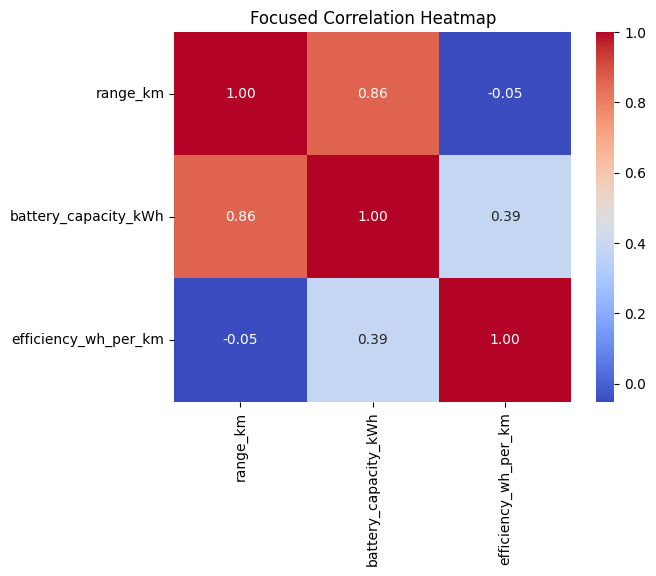

In [58]:
important_features = ['range_km', 'battery_capacity_kWh', 'efficiency_wh_per_km']
sns.heatmap(df[important_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Focused Correlation Heatmap")
plt.show()

In [60]:
# Step: Define dependent and independent variables

# Dependent variable - target
y = df['range_km']

# Independent variables - features
X = df[['battery_capacity_kWh', 'efficiency_wh_per_km', 'towing_capacity_kg',
        'fast_charging_power_kw_dc', 'top_speed_kmh', 'acceleration_0_100_s']]

In [61]:
X

,battery_capacity_kWh,efficiency_wh_per_km,towing_capacity_kg,fast_charging_power_kw_dc,top_speed_kmh,acceleration_0_100_s
0,37.8,156,0.0,67.0,155,7.0
1,37.8,149,0.0,67.0,155,7.0
2,50.8,158,0.0,79.0,200,5.9
3,50.8,158,0.0,79.0,200,6.2
6,50.8,128,0.0,85.0,150,9.0
...,...,...,...,...,...,...
456,107.0,188,2200.0,150.0,180,5.9
457,107.0,188,2200.0,150.0,180,4.9
468,94.0,152,1500.0,135.0,200,7.2
469,94.0,159,2000.0,135.0,200,3.8


In [62]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% data for testing
    random_state=42     # ensures reproducibility
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (211, 6)
X_test shape: (53, 6)
y_train shape: (211,)
y_test shape: (53,)


In [66]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 20.28
Mean Squared Error (MSE): 623.15
Root Mean Squared Error (RMSE): 24.96
R² Score: 0.93
